In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 

In [3]:
data = pd.read_csv('dataset/500_Person_Gender_Height_Weight_Index.csv')

In [4]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [5]:
data.tail()

,Gender,Height,Weight,Index
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [7]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [9]:
from sklearn import svm 
from sklearn.metrics import confusion_matrix , classification_report ,accuracy_score
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split

In [10]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [11]:
gender = LabelEncoder()
data['Gender'] = gender.fit_transform(data['Gender'])

In [12]:
data

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3
...,...,...,...,...
495,0,150,153,5
496,0,184,121,4
497,0,141,136,5
498,1,150,95,5


In [13]:
data.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [14]:
bins = (-1 , 0,1,2,3,4,5)
health = ['malnourished' , 'underweight' , 'fit', 'slightly overweight' , 'overweight' , 'extremely overweight']
data['Index'] = pd.cut(data['Index'], bins= bins , labels=health)
data['Index']

0                overweight
1                       fit
2                overweight
3       slightly overweight
4       slightly overweight
               ...         
495    extremely overweight
496              overweight
497    extremely overweight
498    extremely overweight
499    extremely overweight
Name: Index, Length: 500, dtype: category
Categories (6, object): ['malnourished' < 'underweight' < 'fit' < 'slightly overweight' < 'overweight' < 'extremely overweight']

In [16]:
data['Index'].head()

0             overweight
1                    fit
2             overweight
3    slightly overweight
4    slightly overweight
Name: Index, dtype: category
Categories (6, object): ['malnourished' < 'underweight' < 'fit' < 'slightly overweight' < 'overweight' < 'extremely overweight']

In [17]:
data['Index'].count()

500

In [18]:
data['Index'].value_counts()


extremely overweight    198
overweight              130
fit                      69
slightly overweight      68
underweight              22
malnourished             13
Name: Index, dtype: int64

C:\Users\nd-in\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

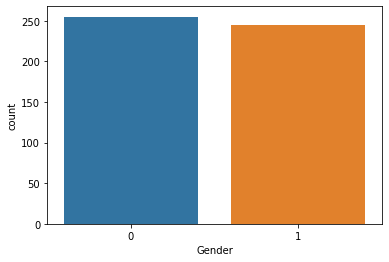

In [19]:
sns.countplot(data['Gender'])

C:\Users\nd-in\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Index', ylabel='count'>

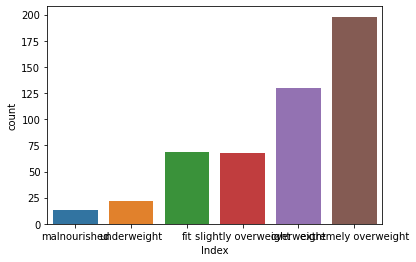

In [20]:
sns.countplot(data['Index'])


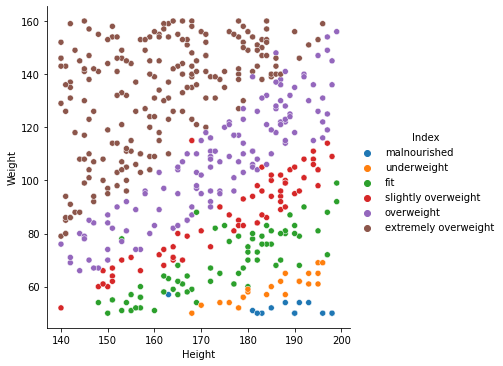

In [21]:
sns.relplot(x="Height" , y ="Weight" , hue="Index" , data=data)

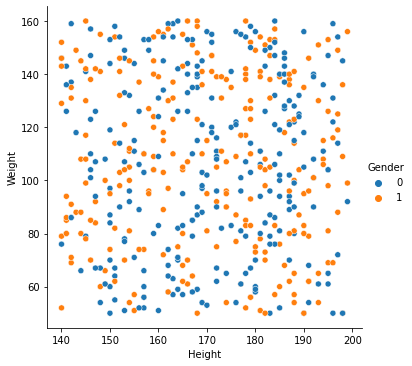

In [22]:
sns.relplot(x="Height" , y ="Weight" , hue="Gender" , data=data)


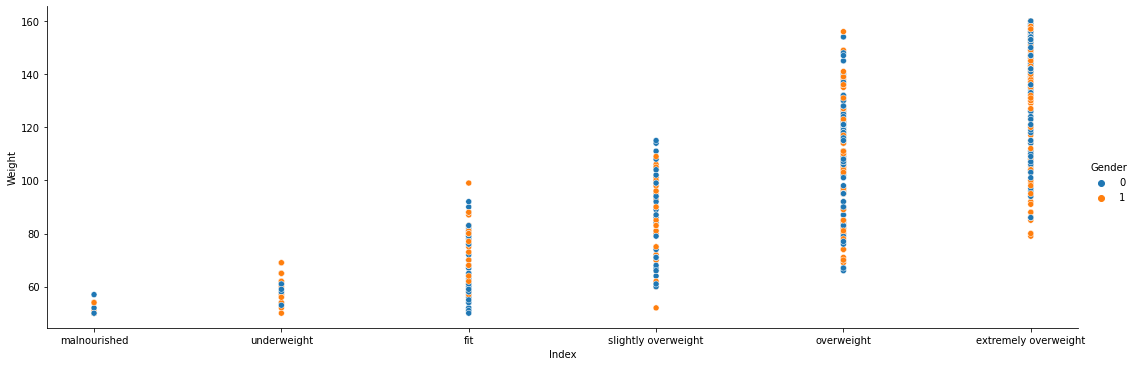

In [24]:
sns.relplot(x="Index" , y ="Weight" , hue="Gender" , data=data , height=5 , aspect=3)


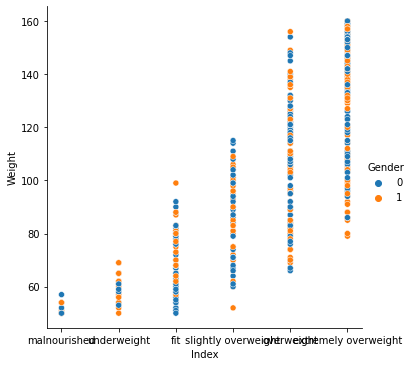

In [25]:
sns.relplot(x="Index" , y ="Weight" , hue="Gender" , data=data )

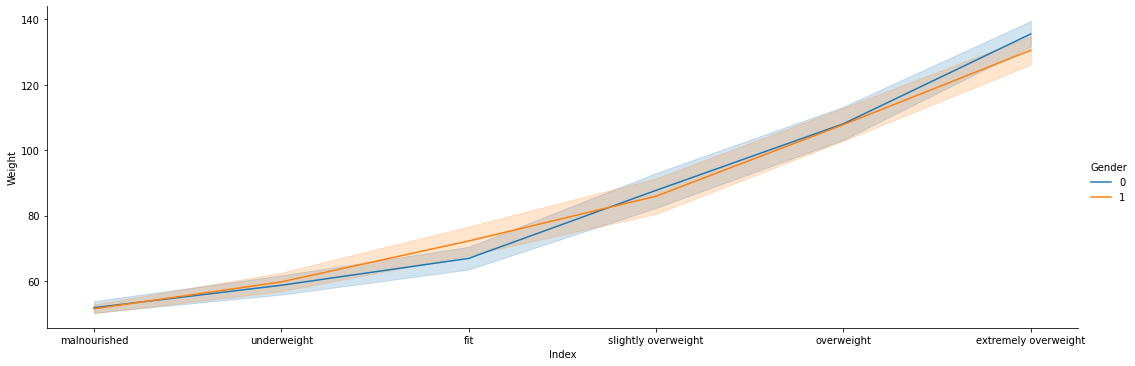

In [26]:
sns.relplot(x="Index" , y="Weight" , hue="Gender" , kind='line' , data=data , height=5 , aspect=3)

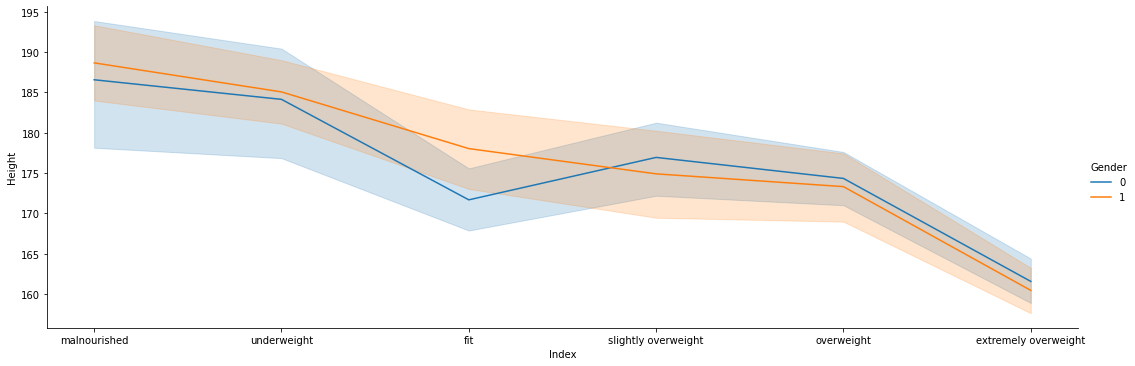

In [27]:
sns.relplot(x="Index" , y="Height" , hue="Gender" , kind='line' , data=data , height=5 , aspect=3)

In [28]:
x = data.drop('Index' , axis=1)
y = data['Index']

In [29]:
x_train , x_test , y_train  , y_test = train_test_split( x,y,test_size=0.2 , random_state=0) 

In [30]:
s = StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)

In [32]:
clf = svm.SVC()
clf.fit(x_train , y_train)
pred = clf.predict(x_test)

In [34]:
print(classification_report(y_test , pred))

                      precision    recall  f1-score   support

extremely overweight       0.88      0.97      0.92        36
                 fit       0.73      0.80      0.76        10
        malnourished       0.00      0.00      0.00         3
          overweight       0.96      0.78      0.86        32
 slightly overweight       0.78      0.93      0.85        15
         underweight       0.60      0.75      0.67         4

            accuracy                           0.85       100
           macro avg       0.66      0.71      0.68       100
        weighted avg       0.84      0.85      0.84       100

C:\Users\nd-in\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nd-in\AppData\Local\Prog

In [35]:
print( confusion_matrix(y_test , pred))

[[35  0  0  1  0  0]
 [ 0  8  0  0  2  0]
 [ 0  1  0  0  0  2]
 [ 5  0  0 25  2  0]
 [ 0  1  0  0 14  0]
 [ 0  1  0  0  0  3]]


In [37]:
print(accuracy_score(y_test , pred))

0.85


In [50]:
a = [[0,190,190]]  # female , height , weight
a = s.transform(a)
b = clf.predict(a)
b

array(['extremely overweight'], dtype=object)

In [42]:
data

,Gender,Height,Weight,Index
0,1,174,96,overweight
1,1,189,87,fit
2,0,185,110,overweight
3,0,195,104,slightly overweight
4,1,149,61,slightly overweight
...,...,...,...,...
495,0,150,153,extremely overweight
496,0,184,121,overweight
497,0,141,136,extremely overweight
498,1,150,95,extremely overweight
